In [1]:
import tensorflow as tf
import numpy as np
import matplotlib.pyplot as plt
from tensorflow import keras

In [3]:
mnist = keras.datasets.mnist

In [4]:
(train_features, train_labels), (test_features, test_labels) = mnist.load_data()

11490434/11490434 [==============================] - 1s 0us/step


In [5]:
train_features.shape

(60000, 28, 28)

In [6]:
test_features.shape

(10000, 28, 28)

image size : (28, 28)
image label: 5


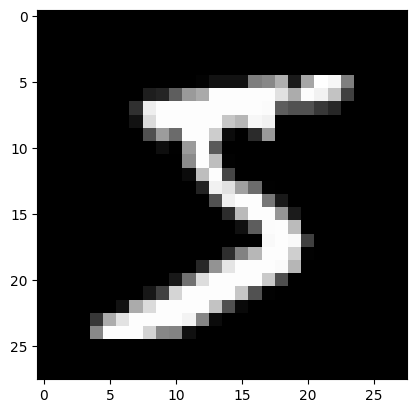

In [12]:
idx = 0

img = train_features[idx]
label = train_labels[idx]

print(f"image size : {img.shape}")
print(f"image label: {label}")
plt.gray()
plt.imshow(img)

# Preprocessing


In [13]:
np.min(img),np.max(img)

(0, 255)

In [16]:
train_features = train_features/255.0
test_features = test_features/255.0

# Model Definiton


In [17]:
model = keras.Sequential()
model.add(keras.layers.Flatten())
model.add(keras.layers.Dense(units=128, activation='relu'))
model.add(keras.layers.Dense(units=128, activation='relu'))
model.add(keras.layers.Dense(units=10, activation='softmax'))

In [18]:
model.compile(optimizer=tf.keras.optimizers.Adam(), loss=tf.keras.losses.SparseCategoricalCrossentropy(), metrics=['accuracy'])

In [19]:
model.build(input_shape=(None,28,28))
model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 flatten (Flatten)           (None, 784)               0         
                                                                 
 dense (Dense)               (None, 128)               100480    
                                                                 
 dense_1 (Dense)             (None, 128)               16512     
                                                                 
 dense_2 (Dense)             (None, 10)                1290      
                                                                 
Total params: 118282 (462.04 KB)
Trainable params: 118282 (462.04 KB)
Non-trainable params: 0 (0.00 Byte)
_________________________________________________________________


In [21]:
hist = model.fit(train_features,train_labels,epochs=1000,batch_size=256,validation_data=(test_features,test_labels))

Epoch 1/1000
235/235 [==============================] - 3s 5ms/step - loss: 0.3950 - accuracy: 0.8892 - val_loss: 0.1798 - val_accuracy: 0.9479
Epoch 2/1000
235/235 [==============================] - 1s 4ms/step - loss: 0.1537 - accuracy: 0.9556 - val_loss: 0.1263 - val_accuracy: 0.9615
Epoch 3/1000
235/235 [==============================] - 1s 4ms/step - loss: 0.1094 - accuracy: 0.9680 - val_loss: 0.1014 - val_accuracy: 0.9695
Epoch 4/1000
235/235 [==============================] - 1s 4ms/step - loss: 0.0815 - accuracy: 0.9761 - val_loss: 0.0940 - val_accuracy: 0.9710
Epoch 5/1000
235/235 [==============================] - 1s 5ms/step - loss: 0.0637 - accuracy: 0.9806 - val_loss: 0.0891 - val_accuracy: 0.9735
Epoch 6/1000
235/235 [==============================] - 1s 5ms/step - loss: 0.0525 - accuracy: 0.9840 - val_loss: 0.0902 - val_accuracy: 0.9714
Epoch 7/1000
235/235 [==============================] - 1s 4ms/step - loss: 0.0438 - accuracy: 0.9871 - val_loss: 0.0769 - val_accuracy:

image size : (28, 28)
image label: 6


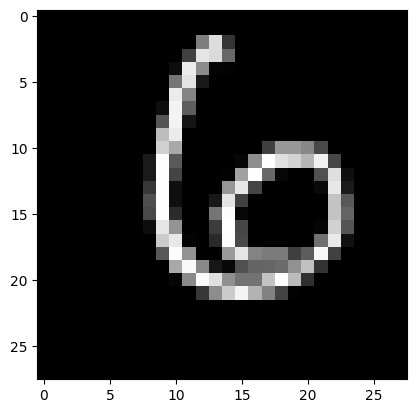

In [26]:
idx = 100
img = test_features[idx]
label = test_labels[idx]
print(f"image size : {img.shape}")
print(f"image label: {label}")

plt.gray()
plt.imshow(img)

In [23]:
test_Data = np.reshape(img,(-1,784))
test_Data.shape

(1, 784)

In [24]:
model.predict(test_Data)

1/1 [==============================] - 0s 92ms/step


array([[6.9405123e-27, 2.4859629e-37, 2.4620638e-32, 0.0000000e+00,
        0.0000000e+00, 9.4454316e-26, 1.0000000e+00, 0.0000000e+00,
        3.5939829e-33, 0.0000000e+00]], dtype=float32)

#Result

As we can see the number of epochs is a lot.we can reach the result with lower amount of epoches and also it can reach overfitting and some problems for higher number of epoches

<function matplotlib.pyplot.show(close=None, block=None)>

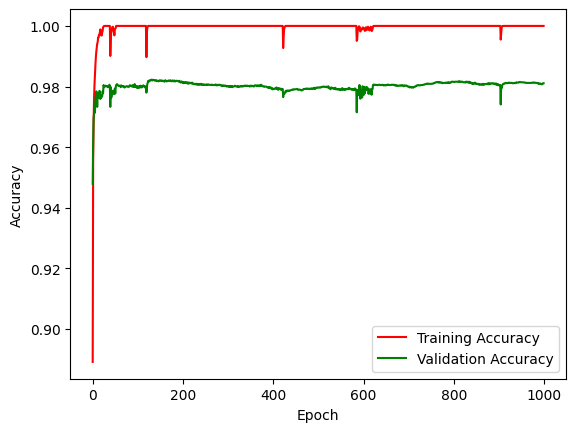

In [25]:
acc = hist.history['accuracy']
val_acc = hist.history['val_accuracy']

plt.plot(acc, label='Training Accuracy',color="red")
plt.plot(val_acc, label='Validation Accuracy',color="green")
plt.xlabel('Epoch')
plt.ylabel('Accuracy')
plt.legend()
plt.show